In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
sys.path.append('./build/lib.win-amd64-cpython-311/')
import ssms
print("ssms version", ssms.__version__, ssms.__path__)
from ssms.basic_simulators.drift_functions import SSP_drift, DMC_drift, DSTP_drift

## SSP

In [2]:
def plot_ssp(p, sda, rd):
    t = np.arange(0, 20, 0.001)
    plt.plot(t,SSP_drift(t=t, p=p,sda=sda,rd=rd,congruency=-1))

ipywidgets.interact(plot_ssp, p=(0.2,0.55), sda=(1,2.6), rd =(0.01,0.5))
plt.show()

interactive(children=(FloatSlider(value=0.375, description='p', max=0.55, min=0.2), FloatSlider(value=1.8, des…

In [3]:
# the parameters sets and simulated results are consist with (White et al., 2011)
sim_out = ssms.basic_simulators.simulator.simulator(
    model = 'full_SSP', 
    theta = {
        'a': 0.13,
        't': 0.3,
        'p': 0.38, 
        'sda': 1.8,
        'rd': 0.02,
        'z': 0.5,
        'sv':0,
        'st':0,
        'sz':0
    },
    n_samples = 1000,
    diff_sigma=0.1               # see (White et al., 2011)
    )
sim_df = pd.DataFrame({
  "rt": sim_out["rts"].squeeze(),
  "response": sim_out["choices"].squeeze(),
  "congruency": sim_out["congruency"]
})

# convert response code (1,-1) to (1,0)
sim_df["response"] = sim_df["response"]*0.5 + 0.5
sim_df.groupby("congruency").mean()

,rt,response
congruency,,
-1,0.928458,0.999
1,0.647891,1.000


congruency
-1    Axes(0.125,0.11;0.775x0.77)
 1    Axes(0.125,0.11;0.775x0.77)
Name: rt, dtype: object

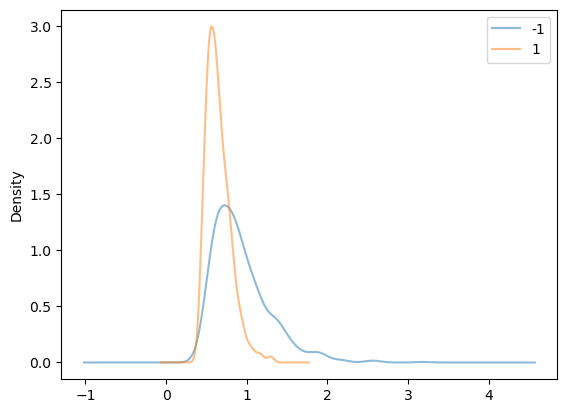

In [4]:
sim_df.groupby("congruency").rt.plot.density(alpha=0.5, legend=True)

## DMC

In [5]:
def plot_dmc(peak, shape, tau):
    t = np.arange(0, 20, 0.001)
    plt.plot(t ,DMC_drift(t=t,vc=0.5, peak=peak, shape=shape, tau=tau))

ipywidgets.interact(plot_dmc, peak=(0,4,0.01), shape=(1.5,5,0.001), tau =(0,5,0.1))
plt.show()

interactive(children=(FloatSlider(value=2.0, description='peak', max=4.0, step=0.01), FloatSlider(value=3.25, …

In [15]:
# the parameters sets and simulated results are consist with (White et al., 2011)
sim_out = ssms.basic_simulators.simulator.simulator(
    model = 'full_DMC', 
    theta = {
        'a': 0.3,
        't': 0.3,
        'vc': 0.3, 
        'peak': 0.5,
        'shape': 2,
        'tau': 0.5,
        'z': 0.5,
        'sv':0,
        'st':0,
        'sz':0
    },
    n_samples = 50,
    diff_sigma = 0.1               # Note,White et al., (2011) use diff_sigma = 4, mat_t = 2000, delta_t = 1. Thus the parameters, peak is about 150, tau is about 80, a is about 150. But the output rt should be divided 1000. 
    )

sim_df = pd.DataFrame({
  "rt": sim_out["rts"].squeeze(),
  "response": sim_out["choices"].squeeze(),
  "congruency": sim_out["congruency"]
})

# convert response code (1,-1) to (1,0)
sim_df["response"] = sim_df["response"]*0.5 + 0.5
sim_df.groupby("congruency").mean()

,rt,response
congruency,,
-1,0.590075,0.92
1,0.424580,1.00


congruency
-1    Axes(0.125,0.11;0.775x0.77)
 1    Axes(0.125,0.11;0.775x0.77)
Name: rt, dtype: object

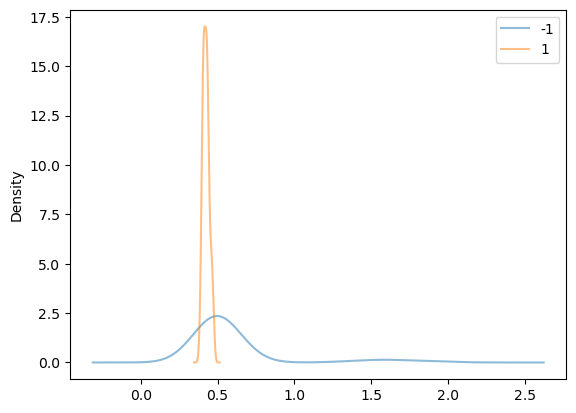

In [17]:
sim_df.groupby("congruency").rt.plot.density(alpha=0.5, legend=True)

## DSTP

In [18]:
def plot_DSTP(vfl=1, vss=0.5, vp2=2, ass=1.5):
    t = np.arange(0, 2, 0.001)
    plt.plot(t,DSTP_drift(t=t, vta=0.3, vfl=vfl, vss=vss, vp2=vp2, ass=ass, zss = 0.5,congruency=-1))

ipywidgets.interact(plot_DSTP, vfl=(0,1,0.01), vss=(0,1,0.01), vp2=(0,1,0.01), ass=(0.1,2,0.01))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='vfl', max=1.0, step=0.01), FloatSlider(value=0.5, de…

In [19]:
# the parameters sets and simulated results are consist with (White et al., 2011)
sim_out = ssms.basic_simulators.simulator.simulator(
    model = 'full_DSTP', 
    theta = {
        'a': 0.2,
        't': 0.3,
        'ass': 0.3, 
        'vta': 0.1, 
        'vfl': 0.5, 
        'vss': 0.2, 
        'vp2': 0.5, 
        'zss': 0.5, 
        'z': 0.5,
        'sv':0,
        'st':0,
        'sz':0
    },
    n_samples = 500,
    diff_sigma = 0.1               # see (White et al., 2011)
    )

sim_df = pd.DataFrame({
  "rt": sim_out["rts"].squeeze(),
  "response": sim_out["choices"].squeeze(),
  "congruency": sim_out["congruency"]
})

# convert response code (1,-1) to (1,0)
sim_df["response"] = sim_df["response"]*0.5 + 0.5
sim_df.groupby("congruency").mean()

,rt,response
congruency,,
-1,0.812552,1.0
1,0.997608,1.0


congruency
-1    Axes(0.125,0.11;0.775x0.77)
 1    Axes(0.125,0.11;0.775x0.77)
Name: rt, dtype: object

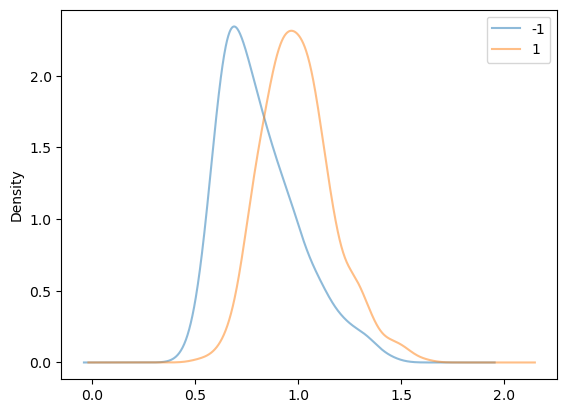

In [20]:
sim_df.groupby("congruency").rt.plot.density(alpha=0.5, legend=True)